In [1]:
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KernelDensity
from scipy import stats

In [2]:
import warnings
#current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline
color = sns.color_palette() 

pd.set_option('display.max_rows', 15000)
pd.set_option('display.max_columns', 100)

In [3]:
%matplotlib inline 

# Load Dataset

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. 

Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

In [4]:
df = pd.read_csv(r'..\tips.csv') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Question: Do customers give more tips during lunch/dinner time?

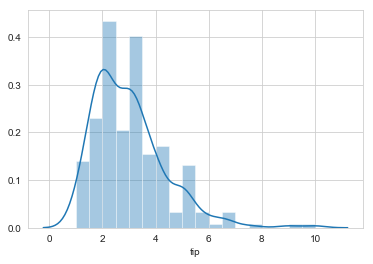

In [7]:
sns.distplot(df.tip)

In [23]:
def plot_prob_density(df_lunch, df_dinner, field, x_start, x_end):
    plt.figure(figsize = (10, 7))

    unit = 1.5
    x = np.linspace(df_lunch.min() - unit, df_lunch.max() + unit, 1000)[:, np.newaxis]

    # Plot the data using a normalized histogram
    plt.hist(df_lunch, bins=10, density=True, label='Lunch Time', color='orange', alpha=0.2)
    plt.hist(df_dinner, bins=10, density=True, label='Dinner Time', color='navy', alpha=0.2)

    # Do kernel density estimation
    kd_lunch = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_lunch)
    kd_dinner = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_dinner)

    # Plot the estimated densty
    kd_vals_lunch = np.exp(kd_lunch.score_samples(x))
    kd_vals_dinner = np.exp(kd_dinner.score_samples(x))

    plt.plot(x, kd_vals_lunch, color='orange')
    plt.plot(x, kd_vals_dinner, color='navy')
    
    plt.axvline(x=x_start,color='red',linestyle='dashed')
    plt.axvline(x=x_end,color='red',linestyle='dashed')

    # Show the plots
    plt.xlabel(field, fontsize=15)
    plt.ylabel('Probability Density', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
    gc.collect()
    return kd_lunch, kd_dinner

In [9]:
def get_probability(start_value, end_value, eval_points, kd):
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)

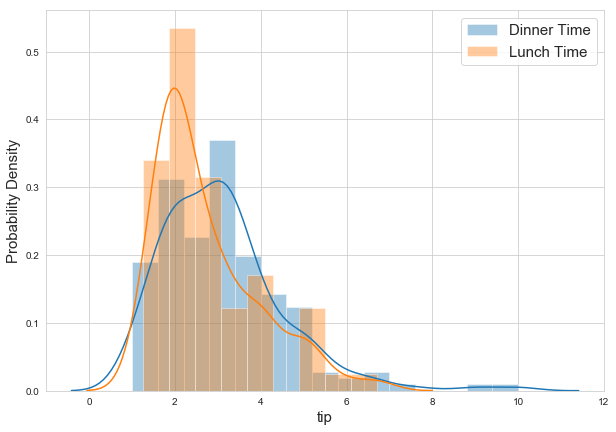

In [16]:
plt.figure(figsize = (10, 7))
sns.distplot(df.tip[df.time == 'Dinner'], label='Dinner Time')
sns.distplot(df.tip[df.time == 'Lunch'], label='Lunch Time')
plt.xlabel('tip', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [11]:
df_lunch = df[df.time == 'Lunch']
df_dinner = df[df.time == 'Dinner']

In [12]:
field = 'tip'
data_lunch = np.array(df_lunch['%s'%field]).reshape(-1, 1)
data_dinner = np.array(df_dinner['%s'%field]).reshape(-1, 1)

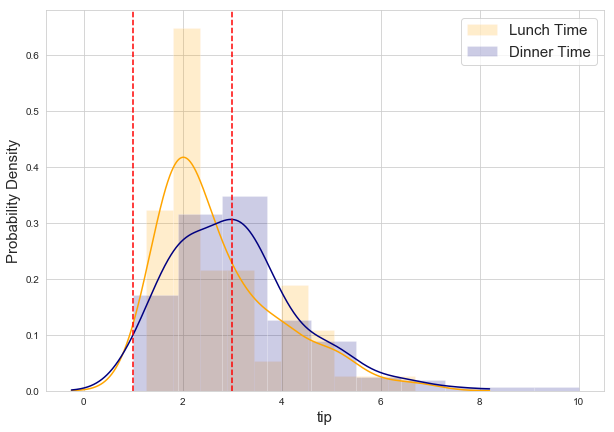

In [24]:
kd_lunch, kd_dinner = plot_prob_density(data_lunch, data_dinner, field, x_start=1, x_end=3)

In [27]:
print('Probability of customers giving 1-3 USD tips during LUNCH time: {}\n'
      .format(get_probability(start_value = 1, 
                              end_value = 3, 
                              eval_points = 100, 
                              kd = kd_lunch)))
print('Probability of customers giving 1-3 USD tips during DINNER time: {}'
      .format(get_probability(start_value = 1, 
                              end_value = 3, 
                              eval_points = 100, 
                              kd = kd_dinner)))

Probability of customers giving 1-3 USD tips during LUNCH time: 0.6341

Probability of customers giving 1-3 USD tips during DINNER time: 0.4899


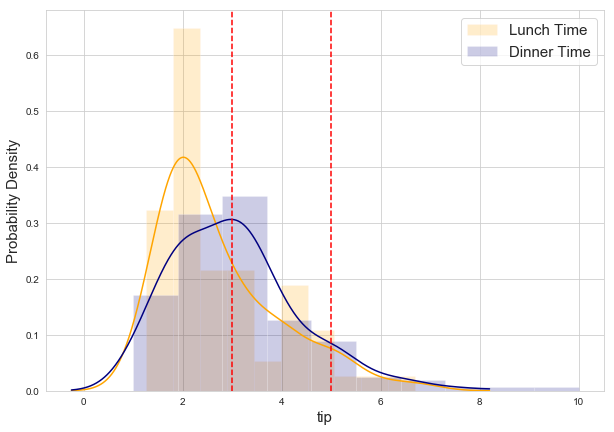

In [25]:
kd_lunch, kd_dinner = plot_prob_density(data_lunch, data_dinner, field, x_start=3, x_end=5)

In [28]:
print('Probability of customers giving 3-5 USD tips during LUNCH time: {}\n'
      .format(get_probability(start_value = 3, 
              end_value = 5, 
              eval_points = 100, 
              kd = kd_lunch)))
print('Probability of customers giving 3-5 USD tips during DINNER time: {}'
      .format(get_probability(start_value = 3, 
              end_value = 5, 
              eval_points = 100, 
              kd = kd_dinner)))

Probability of customers giving 3-5 USD tips during LUNCH time: 0.2653

Probability of customers giving 3-5 USD tips during DINNER time: 0.3792
